# Kmeans Overview

Clustering is a technique to divide data into different groups, where the records in
each group are similar to one another. The goal of clustering is to identify significant
and meaningful groups of data. The **groups can be used directly, analyzed in more
depth, or passed as a feature or an outcome** to a predictive regression or classification
model. Also, when a ground truth is not known, it is frequently used during the exploratory 
phase to surface data patterns. 

K-means is a *hard unsupervised partitioning algorithm* and the *first clustering method to be developed back in 1957 at Bell Labs*; it is still widely used, owing its popularity to the **relative simplicity** of the algorithm and its **ability to scale** to large data sets. The standard k-means algorithm **applies well to numerical data**. When **both numerical and categorical data** categorical features are encoded, however, for multiple categories this may lead to the "curse of dimensionality". Interaction encoding between a categorical and a continuous feature has been proposed as a better alternative. [Principal Component Analysis](https://realpython.com/k-means-clustering-python/) has also been used taking the principal component scores as input. K-mode has been applied in specific to categorical features. For more info check [this](https://www.kaggle.com/general/19741). On the other hand, as K-means more often uses Mikowsky distances (Manhattan-L1, Euclidean-L2, or Chevishev-Linf), **this requires the scaling or normalization of data** to avoid the dominance of certain features. 
While the exact solution to K-means is computationally very difficult (np-hard), heuristic algorithms (as the one described here) provide an efficient way to compute a locally optimal solution. 
K-means is a non-parametric method and, therefore, prompt to high variance. However, in large datasets the number of cluster elements may truncate due to the ["hard" membership restriction](https://www.researchgate.net/publication/287829457_On_the_bias_and_inconsistency_of_K-means_clustering) and this may cause underfitting.


**Main ideas:**
- A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid.
- K-means does not ensure the clusters will have the same size, although it assumes similar number of observations. 
- Finds the clusters that are the best separated.
- Pros: High interpretability and scaling; relatively easy to implement, guaranteed convergence; adapts easily to new datasets.
- Cons: The user has to specify k (the number of clusters) in the beginning; sensitive to initialization and to outliers, requires normalization o f features, can only handle numerical data.

**General method:**
K-means is implemented in two main steps: (1) Point assignment and (2) Centroid update. The algorithm starts with a user-specified number of clusters (K) and an initial set of cluster means, then, iterates through the main steps. The algorithm converges when the assignment of records to clusters does not change. In step 1 the points are assigned by minimizing their sum of squared distances (or other distance metric) to the nearest cluster mean or centroid. After this, in step 2, centroids are recalculated as the mean of all points belonging to the cluster. Various methods have been identified to make the initial partition with varying rates of performance since the method is sensitive to initial cluster assignments. The assignment phase is sometimes called the *expectation* phase while the update phase is sometimes called the *maximization* phase as the algorithm is considered a variant of the *expectation-maximization method* (another partitional clustering method). Since this algorithm isn’t guaranteed to find the best possible solution, it is recommended to run the it several times using different random samples to initialize it. When more than one set of iterations is used, the K-means result is given by the iteration that has the lowest within-cluster sum of squares. 


**Algorithm parameters:**
    - Number of centroids(K)
    - Distance metric
    
**Number of clusters or centroids (K):** The algorithm requires the initial provision of a certain number of clusters. Both the number and location of centroids can be initially determined by a visual exploration of the dataset. The "elbow method" or the "scree-plot" (based on SS) and the silhoutte method (based on cohesion measures) are widely used to identify the number of [centroids](https://towardsdatascience.com/10-tips-for-choosing-the-optimal-number-of-clusters-277e93d72d92).

**Distance metric:** K-means generally uses Euclidean distance to estimate distance to the nearest cluster mean. Alternatively, Manhattan, Tchevichev, Mahalanobis, Pearson distances can be used. [This](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0144059#:~:text=Since%20in%20distance%2Dbased%20clustering,the%20performance%20of%20clustering%20algorithms.&text=These%20datasets%20are%20classified%20into,is%20studied%20against%20each%20category) article presents a comprehensive study of cluster distance.

**Use cases:**

In text analysis:
- Document classification where features represent the frequency of terms
- Fake news identification, here frequency of certain "sensationalized" terms is compared, as well as time and source location.

In crime prevention:
- Fraud detection where features may include number and value of transactions, location, etc. New events are isolated based on proximity to clusters that indicate fraudulent patterns.
- Cyber-profiling where criminales may be assigned to a certain cluster based on their profile.
- Fraudulent Tax-drivers where taxi drivers can be grouped by their GPS activity.

In transportation:
- Rideshare analysis where features as traffic, transit time, peak pickup localities may be used to label high demand locations.
- Store delivery where, first, stores are clustered per order volume, products ordered, location, etc. and, then, a routing algorithm is used to assign delivery fleet.

In IT:
- Segment network traffic arriving to website as potentially being spam, both generated or other. Features may include traffic volume and sources.
- Prioritization of IT alerts where technology components such as network, storage, or database can be grouped by their data volume, failure rates, severity scale and mean time to repair.

# Python implementation

## K-means from sctrach
Let's use the Iris dataset to demonstrate our code. This dataset is labeled, to implement k-means we will simply extract the features to predict labels for different flowers. At the end we will compare the results generated by the algorithm against the ground truth.    
    https://realpython.com/k-means-clustering-python/

In [36]:
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

#data = load_iris()
iris = datasets.load_iris()

# Create dataframe to store iris data
iris_df = pd.DataFrame(data=iris.data, columns= iris.feature_names)
iris_df['target'] = iris.target_names[iris.target]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [41]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [38]:
X = iris.data
y = iris.target

In [ ]:
from copy import deepcopy
K=3 # number of clusters
n= X.shape[0] # number of training data
c= X.shape[1]  # number of features in the data

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(X, axis = 0)
std = np.std(X, axis = 0)
centers = np.random.randn(K, c)*std +mean

centers_new = np.zeros(centers.shape)
centers_old = deepcopy(centers)

clusters = np.zeros(n)
distances = np.zeros((n, K))

error = np.linalg.norm(centers_new - centers_old)

# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    for i in range(K):
        distances[.,i] = np.linalgo.norm(X - centers_new[i], axis =1)
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(K):
        centers_new[i] = np.mean(X[clusters == i], axis = 0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new


colors = ['Green', 'Orange', 'Blue']
for i in range(n):
    plt.scatter(X[i,0], X[i,1]), s=7, color = colors[int(y[i])]
    
plt.scatter(centers_new[:,0], centers_new[:,1]), s=150, marker = 'o', c = 'r']    


## K-means in sklearn

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [6]:
# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [17]:
# Estimate best k value using the "elbow-method"
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

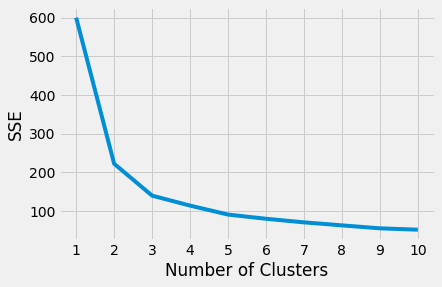

In [18]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

According to this graph the variance is significantly reduced with three clusters, possibly 4. After this point, though, creating more clusters will not improve much distances within clusters.

In [22]:
# Let's, then, call model instance for 3 clusters
from sklearn.cluster import KMeans

kmeans = KMeans(
    init="random", # sets method for the initial assignment of points to centroids
    n_clusters=3, # number of clusters (centroids) to form
    n_init=10, # number of times the algo will be run using different centroids
    max_iter=300,  # limits the number of iterations in each run
    random_state=42  # ensures consistency in results across systems
)

# for other parameters check this: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [23]:
#Fit model
kmeans.fit(scaled_features)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [24]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

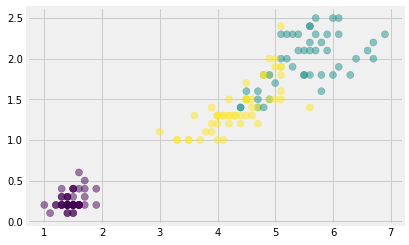

In [44]:
plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'], s=50, alpha=0.5, c= kmeans.labels_.astype(float))